In [39]:
# Import necessary libraries
import numpy as np
import os

from scipy.io import loadmat, savemat

In [40]:
# Define necessary functions
# Function to load the data
def get_data(file_directory, void_number):

    print(f'Retrieving data from void {void_number}...')
    
    # Load the displacement data
    displacement_data = loadmat(os.path.join(file_directory, 'void_' + str(void_number) + '_displacement_data.mat'))
    
    # Load the void data
    void_data = loadmat(os.path.join(file_directory, 'void_' + str(void_number) + '_void_data.mat'))
    
    return displacement_data['displacement_data'], void_data['void_data']

In [41]:
# Function to split the data into training, validation, and testing sets
def dataset_divider(min_samples, displacement_data, void_data):

    start_size = 0
    training_index = int((80/100) * min_samples)
    validation_index = training_index + int((10/100) * min_samples)
    test_index = min_samples

    # Split the displacement data
    training_displacement_data = displacement_data[start_size:training_index]
    validation_displacement_data = displacement_data[training_index:validation_index]
    test_displacement_data = displacement_data[validation_index:test_index]

    # Split the void data
    training_void_data = void_data[start_size:training_index]
    validation_void_data = void_data[training_index:validation_index]
    test_void_data = void_data[validation_index:test_index]

    return training_displacement_data, validation_displacement_data, test_displacement_data, training_void_data, validation_void_data, test_void_data

In [42]:
# Function to save dataset
def save_data(displacement_data, void_data, displacement_file_name, void_file_name, file_directory_to_save_data):

    # Save the displacement data
    savemat(os.path.join(file_directory_to_save_data, displacement_file_name), {'displacement_data': displacement_data})

    # Save the void data
    savemat(os.path.join(file_directory_to_save_data, void_file_name), {'void_data': void_data})

In [43]:
# Define directories
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
grandparent_directory = os.path.dirname(parent_directory)

# Directory to converted data from cell to matrix
converted_directory = os.path.join(grandparent_directory, 'data', 'converted')

# Directory to organized data
organized_directory = os.path.join(grandparent_directory, 'data', 'divided')

In [44]:
# Get the displacement and void data for all three voids
void_0_displacement_data, void_0_void_data = get_data(converted_directory, 0)
void_1_displacement_data, void_1_void_data = get_data(converted_directory, 1)
void_2_displacement_data, void_2_void_data = get_data(converted_directory, 2)

Retrieving data from void 0...
Retrieving data from void 1...
Retrieving data from void 2...


In [45]:
# Since all the data does not have same number of samples, we find the minimum number of samples
min_samples = min(void_0_displacement_data.shape[0], void_1_displacement_data.shape[0], void_2_displacement_data.shape[0])

In [46]:
# Randomly shuffle the data based on a seed
SEED = 42

np.random.seed(SEED)

# Shuffle the data
# Void 0
void_0_indices = np.random.permutation(void_0_displacement_data.shape[0])

void_0_displacement_data = void_0_displacement_data[void_0_indices]
void_0_void_data = void_0_void_data[void_0_indices]

# Void 1
void_1_indices = np.random.permutation(void_1_displacement_data.shape[0])

void_1_displacement_data = void_1_displacement_data[void_1_indices]
void_1_void_data = void_1_void_data[void_1_indices]

# Void 2
void_2_indices = np.random.permutation(void_2_displacement_data.shape[0])

void_2_displacement_data = void_2_displacement_data[void_2_indices]
void_2_void_data = void_2_void_data[void_2_indices]

In [47]:
# Split the data into training, validation, and testing sets
void_0_training_displacement_data, void_0_validation_displacement_data, void_0_test_displacement_data, void_0_training_void_data, void_0_validation_void_data, void_0_test_void_data = dataset_divider(min_samples, void_0_displacement_data, void_0_void_data)
void_1_training_displacement_data, void_1_validation_displacement_data, void_1_test_displacement_data, void_1_training_void_data, void_1_validation_void_data, void_1_test_void_data = dataset_divider(min_samples, void_1_displacement_data, void_1_void_data)
void_2_training_displacement_data, void_2_validation_displacement_data, void_2_test_displacement_data, void_2_training_void_data, void_2_validation_void_data, void_2_test_void_data = dataset_divider(min_samples, void_2_displacement_data, void_2_void_data)

In [48]:
# Save the data
# Void 0
print(f'Saving void 0 data...')
save_data(void_0_training_displacement_data, void_0_training_void_data, 'void_0_training_displacement_data.mat', 'void_0_training_void_data.mat', organized_directory)
save_data(void_0_validation_displacement_data, void_0_validation_void_data, 'void_0_validation_displacement_data.mat', 'void_0_validation_void_data.mat', organized_directory)
save_data(void_0_test_displacement_data, void_0_test_void_data, 'void_0_test_displacement_data.mat', 'void_0_test_void_data.mat', organized_directory)

# Void 1
print(f'Saving void 1 data...')
save_data(void_1_training_displacement_data, void_1_training_void_data, 'void_1_training_displacement_data.mat', 'void_1_training_void_data.mat', organized_directory)
save_data(void_1_validation_displacement_data, void_1_validation_void_data, 'void_1_validation_displacement_data.mat', 'void_1_validation_void_data.mat', organized_directory)
save_data(void_1_test_displacement_data, void_1_test_void_data, 'void_1_test_displacement_data.mat', 'void_1_test_void_data.mat', organized_directory)

# Void 2
print(f'Saving void 2 data...')
save_data(void_2_training_displacement_data, void_2_training_void_data, 'void_2_training_displacement_data.mat', 'void_2_training_void_data.mat', organized_directory)
save_data(void_2_validation_displacement_data, void_2_validation_void_data, 'void_2_validation_displacement_data.mat', 'void_2_validation_void_data.mat', organized_directory)
save_data(void_2_test_displacement_data, void_2_test_void_data, 'void_2_test_displacement_data.mat', 'void_2_test_void_data.mat', organized_directory)

Saving void 0 data...
Saving void 1 data...
Saving void 2 data...


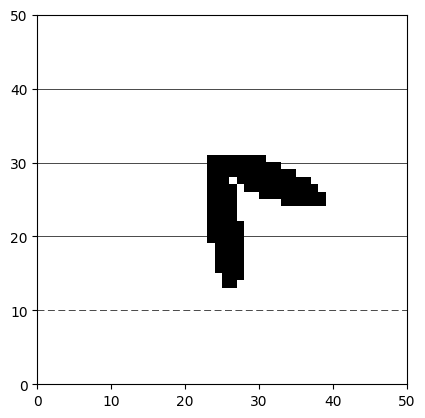

In [49]:
import matplotlib.pyplot as plt

target = void_2_test_void_data

# Plot the void data
sample_number = np.random.randint(0, target.shape[0])

target = np.reshape(target, (target.shape[0], 50, 50))

# See how the actual void looks in target
actual_plot = plt.figure()
ax = plt.axes()
im1 = plt.imshow(target[sample_number, :, :], cmap='binary', origin='lower', vmin=0, vmax=1, extent=[0, 50, 0, 50])
    
# Domain section lines
plt.axhline(y=10, color='k', linewidth = 0.5, linestyle='--', dashes=(10, 5))
plt.axhline(y=20, color='k', linewidth = 0.5)
plt.axhline(y=30, color='k', linewidth = 0.5)
plt.axhline(y=40, color='k', linewidth = 0.5)